In [99]:
from selenium import webdriver
from bs4 import BeautifulSoup
from time import sleep
from datetime import datetime, timedelta
import pandas as pd

options=webdriver.Chrome("C:/../chromedriver")
#options.add_argument('--incognito')
driver=options

urls=['https://apps.apple.com/de/app/mercedes-me/id1487652920#see-all/reviews']

data={
    "date": [],
    "user": [],
    "rating": [],
    "rating_calc":[],
    "title": [],
    "feedback": [],
    "response":[]
}

for url in urls:
    driver.get(url)
    for i in range(max(0,100)): # here you will need to tune to see exactly how many scrolls you need
        driver.execute_script('window.scrollBy(0, 150)')
        sleep(1)
    
    src=driver.page_source
    soup=BeautifulSoup(src, 'html.parser')
    posts = driver.find_elements_by_xpath('//div[@class="we-customer-review lockup"]')
    count_posts = len(posts) -1
    i = 0
    k = 0
    for post in posts:
        #Dates
        dates = post.find_elements_by_xpath('//time[@class="we-customer-review__date"]')
        data["date"].append(dates[i].text)
        #Users 
        users = post.find_elements_by_xpath('//span[@class="we-truncate we-truncate--single-line  we-customer-review__user"]')
        data["user"].append(users[i].text)
        #Ratings
        ratings = post.find_elements_by_xpath('//figure[@class="we-star-rating we-customer-review__rating we-star-rating--large"]')
        data["rating"].append(ratings[i].get_attribute("aria-label"))
        data["rating_calc"].append(int(ratings[i].get_attribute("aria-label")[0:1]))
        #Title
        titles = post.find_elements_by_xpath('//h3[@class="we-truncate we-truncate--single-line  we-customer-review__title"]')
        #titles = soup.find_all("h3",{"class":"we-truncate we-truncate--single-line we-customer-review__title"},limit=1)
        data["title"].append(titles[i].text)
        #Feedback
        #feedbacks = post.find_elements_by_xpath('//blockquote[@class="we-truncate we-truncate--multi-line we-truncate--interactive  we-truncate--truncated we-customer-review__body"]')
        feedbacks = post.find_elements_by_xpath('//h3[@class="we-truncate we-truncate--single-line  we-customer-review__title"]/following::blockquote[1]')
        data["feedback"].append(feedbacks[i].text)
        #Response
        responses = post.find_elements_by_xpath('//h3[@class="we-customer-review__header we-customer-review__header--response"]/following::blockquote[1]')
        data["response"].append(responses[i].text)
        i = i+1
driver.close()

In [100]:
#data

df=pd.DataFrame(data)
df

,date,user,rating,rating_calc,title,feedback,response
0,30.07.2020,Axantoonya,5 von 5,5,Nicht verbessert eher verschlechtert,Leider ist diese App viel umständlicher und ei...,"Danke für dein ausführliches Feedback, Axantoo..."
1,28.07.2020,Superdirk2,5 von 5,5,Gelungenes Design und gute Funktionalität,Gegenüber der alten App ein echter Fortschritt...,Ist notiert. Herzlichen Dank für dein Feedback...
2,11.08.2020,Kasi607,5 von 5,5,Mindestens ein Schritt zurück als nach vorn!,Ich finde die neue App ist eher ein Rückschrit...,"Der nehmen wir uns gerne an, Kasi607! 😊 Wir be..."
3,27.07.2020,BerlinFrischi,5 von 5,5,Sehr schön,"Ich bin froh, dass es endlich eine App für mei...",Das nächste Update steht schon in den Startlöc...
4,29.07.2020,Sven-Auke,5 von 5,5,Bin gespannt auf weitere Funktionen,Mir gefällt die App sehr gutbürgerlich auch sc...,"Herzlichen Dank, Sven! 😍👍"
5,19.11.2020,Saffa_Al,5 von 5,5,Nie mehr ohne!,"Ich dachte schon, dass die alte App klasse ist...",Daran arbeiten wir schon. Danke für dein tolle...
6,30.07.2020,Paull001,4 von 5,4,Gute Features,Übersichtlich!,"Herzlichen Dank, Paull001! 🤗"
7,03.10.2020,flogsc,5 von 5,5,"Übersichtlich, schnell, einfach",Super geworden nach der Neuauflage. Die App is...,"😍👍 Dankeschön, flogsc!"
8,07.12.2020,Nautica911,4 von 5,4,Nicht immer zuverlässig,"Die App hat sich sehr verbessert, lediglich di...","Herzlichen Dank für dein Feedback, Nautica911!..."
9,22.09.2020,Spacy333,4 von 5,4,Leider nur 4 Sterne,Leider funktioniert die App nach der Erneuerun...,"Hallo Spacy333, die Synchronisierung und Anzei..."


In [101]:
#Step 2
import nltk
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df, x="rating_calc")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Rating')
fig.show()


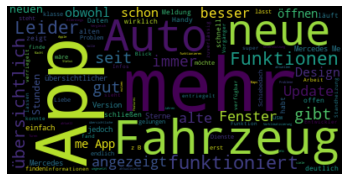

In [102]:
#Step3

import nltk
from nltk.corpus import stopwords 
from wordcloud import WordCloud


# Create stopword list:
stopwords = set(stopwords.words('german'))
stopwords.update(["wurde","obwohl","leider","gibt","obwohl","immer"])
textt = " ".join(review for review in df.feedback)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_all.png')
plt.show()

In [103]:
# assign reviews with score >= 4 as positive sentiment
# score < 4 negative sentiment
# remove score = 4

#df = df[df['rating_calc'] != 3]
df['sentiment'] = df['rating_calc'].apply(lambda rating : +1 if rating >= 4 else -1)

In [104]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

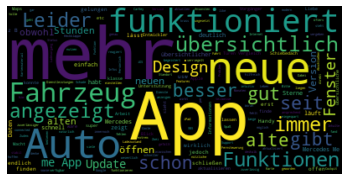

In [105]:
# good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.feedback)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_positive.png')
plt.show()

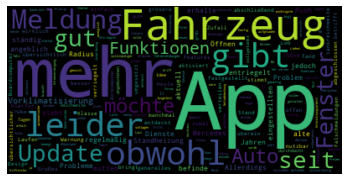

In [106]:
neg = " ".join(review for review in negative.feedback)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_negative.png')
plt.show()

In [107]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [108]:
#Overall Frequencies
frequencies = wordcloud.process_text(textt)
df1 = pd.DataFrame.from_dict(frequencies,orient='index',columns=['frequency'])
df1.head()
df1.to_excel("overall.xlsx")

In [109]:
#Positive Frequencies
frequencies = wordcloud2.process_text(pos)
df2 = pd.DataFrame.from_dict(frequencies,orient='index',columns=['frequency'])
df2.head()
df2.to_excel("positive.xlsx")

In [110]:
#Negative Frequencies
frequencies = wordcloud3.process_text(neg)
df3 = pd.DataFrame.from_dict(frequencies,orient='index',columns=['frequency'])
df3.head()
df3.to_excel("negative.xlsx")